In [1]:
import pandas as pd
#from functions import process
import numpy as np
from matplotlib import pyplot as plt
import collections
from tqdm import tqdm
#from scipy.stats import gaussian_kde
#from itertools import combinations 
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.metrics import pairwise_distances
#from statsmodels.nonparametric.smoothers_lowess import lowess

In [74]:
DTI_final=pd.read_csv('data/DTI_index.csv')
davis_metz = pd.read_csv('val_data/davis_metz_DTI.csv')[['protein_id', 'compound_id']]
davis_anas = pd.read_csv('val_data/davis_anas.csv')[['protein_id', 'compound_id']]

In [7]:
# Prepare data for plots
def lis(ctr, ctr_t):
    lists = sorted(ctr) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    lists_t = sorted(ctr_t) # sorted by key, return a list of tuples
    x_t, y_t = zip(*lists_t) # unpack a list of pairs into two tuples

    percent = per(y,21)
    percent_t = per(y_t,21)
    return x, y, x_t, y_t, percent, percent_t

def per(y, lim):
    per = []
    for i in range(1,lim):
        p = sum(y[0:i])/sum(y)
        per = np.append(per, p)
    return per

reference = DTI_final[['target', 'drug']]
ctr = sorted(collections.Counter(collections.Counter(reference['target']).values()).items())
ctr_t = sorted(collections.Counter(collections.Counter(reference['drug']).values()).items())

reference_metz = davis_metz
ctr_metz = sorted(collections.Counter(collections.Counter(reference_metz['protein_id']).values()).items())
ctr_metz_t = sorted(collections.Counter(collections.Counter(reference_metz['compound_id']).values()).items())

reference_anas = davis_anas
ctr_anas = sorted(collections.Counter(collections.Counter(reference_anas['protein_id']).values()).items())
ctr_anas_t = sorted(collections.Counter(collections.Counter(reference_anas['compound_id']).values()).items())

x, y, x_t, y_t, percent, percent_t = lis(ctr, ctr_t)
x_metz, y_metz, x_t_metz, y_t_metz, percent_metz, percent_t_metz = lis(ctr_metz, ctr_metz_t)
x_anas, y_anas, x_t_anas, y_t_anas, percent_anas, percent_t_anas = lis(ctr_anas, ctr_anas_t)

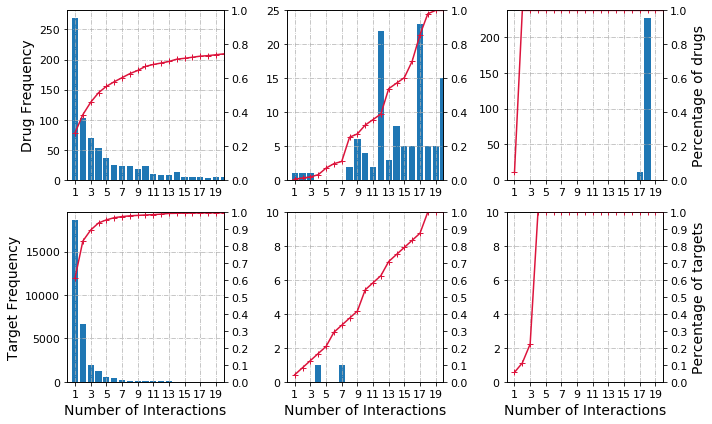

In [72]:
# FAILED ATTEMPT

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig, ax = plt.subplots(2,3,figsize=(10,6))

#DTI
# Subplot 1
ax[0][0].bar(x,y)
ax[0][0].tick_params(axis="x", labelsize=11)
ax[0][0].tick_params(axis="y", labelsize=11)
ax[0][0].set_ylabel('Drug Frequency', fontsize = 14)
#ax[0][0].set_xlabel('Number of Interactions', fontsize = 14)
ax[0][0].grid(linestyle='-.', linewidth=0.7)
ax[0][0].set_xlim([0,20])
ax[0][0].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs0 = ax[0][0].twinx()
axs0.plot(x[0:20], percent ,marker='+', color='crimson')
axs0.set_ylim([0,1])
#axs0.set_yticks(np.arange(0, 1.1, 0.1))
axs0.tick_params(axis='y', labelsize=11)
#axs0.set_ylabel('Percentage of drugs', fontsize = 14)

# Subplot 2
ax[1][0].bar(x_t,y_t)
ax[1][0].tick_params(axis="x", labelsize=11)
ax[1][0].tick_params(axis="y", labelsize=11)
ax[1][0].set_ylabel('Target Frequency', fontsize = 14)
ax[1][0].set_xlabel('Number of Interactions', fontsize = 14)
ax[1][0].grid(linestyle='-.', linewidth=0.7)
#ax[1][0].set_ylim([0,15500])
ax[1][0].set_xlim([0,20])
ax[1][0].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs1 = ax[1][0].twinx()
axs1.plot(x_t[0:20], percent_t ,marker='+', color='crimson')
axs1.set_ylim([0,1])
axs1.set_yticks(np.arange(0, 1.1, 0.1))
axs1.tick_params(axis='y', labelsize=11)
#axs1.set_ylabel('Percentage of targets', fontsize = 14)
plt.tight_layout()

#METZ
# Subplot 1
ax[0][1].bar(x_metz,y_metz)
ax[0][1].tick_params(axis="x", labelsize=11)
ax[0][1].tick_params(axis="y", labelsize=11)
#ax[0][1].set_ylabel('Drug Frequency', fontsize = 14)
#ax[0][1].set_xlabel('Number of Interactions', fontsize = 14)
ax[0][1].grid(linestyle='-.', linewidth=0.7)
ax[0][1].set_xlim([0,20])
ax[0][1].set_ylim([0,25])
ax[0][1].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs0 = ax[0][1].twinx()
axs0.plot(x[0:20], percent_metz ,marker='+', color='crimson')
axs0.set_ylim([0,1])
#axs0.set_yticks(np.arange(0, 1.1, 0.1))
axs0.tick_params(axis='y', labelsize=11)
#axs0.set_ylabel('Percentage of drugs', fontsize = 14)

# Subplot 2
ax[1][1].bar(x_t_metz,y_t_metz)
ax[1][1].tick_params(axis="x", labelsize=11)
ax[1][1].tick_params(axis="y", labelsize=11)
#ax[1][1].set_ylabel('Target Frequency', fontsize = 14)
ax[1][1].set_xlabel('Number of Interactions', fontsize = 14)
ax[1][1].grid(linestyle='-.', linewidth=0.7)
ax[1][1].set_ylim([0,10])
ax[1][1].set_xlim([0,20])
ax[1][1].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs1 = ax[1][1].twinx()
axs1.plot(x_t[0:20], percent_t_metz ,marker='+', color='crimson')
axs1.set_ylim([0,1])
axs1.set_yticks(np.arange(0, 1.1, 0.1))
axs1.tick_params(axis='y', labelsize=11)
#axs1.set_ylabel('Percentage of targets', fontsize = 14)
plt.tight_layout()

#ANAS
# Subplot 1
ax[0][2].bar(x_anas, y_anas)
ax[0][2].tick_params(axis="x", labelsize=11)
ax[0][2].tick_params(axis="y", labelsize=11)
#ax[0][1].set_ylabel('Drug Frequency', fontsize = 14)
#ax[0][1].set_xlabel('Number of Interactions', fontsize = 14)
ax[0][2].grid(linestyle='-.', linewidth=0.7)
ax[0][2].set_xlim([0,20])
ax[0][2].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs0 = ax[0][2].twinx()
axs0.plot(x[0:20], percent_anas ,marker='+', color='crimson')
axs0.set_ylim([0,1])
#axs0.set_yticks(np.arange(0, 1.1, 0.1))
axs0.tick_params(axis='y', labelsize=11)
axs0.set_ylabel('Percentage of drugs', fontsize = 14)

# Subplot 2
ax[1][2].bar(x_t_anas,y_t_anas)
ax[1][2].tick_params(axis="x", labelsize=11)
ax[1][2].tick_params(axis="y", labelsize=11)
#ax[1][2].set_ylabel('Target Frequency', fontsize = 14)
ax[1][2].set_xlabel('Number of Interactions', fontsize = 14)
ax[1][2].grid(linestyle='-.', linewidth=0.7)
ax[1][2].set_ylim([0,10])
ax[1][2].set_xlim([0,20])
ax[1][2].set_xticks(np.arange(1, 21, 2))
# Twin axis
axs1 = ax[1][2].twinx()
axs1.plot(x_t[0:20], percent_t_anas ,marker='+', color='crimson')
axs1.set_ylim([0,1])
axs1.set_yticks(np.arange(0, 1.1, 0.1))
axs1.tick_params(axis='y', labelsize=11)
axs1.set_ylabel('Percentage of targets', fontsize = 14)
plt.tight_layout()

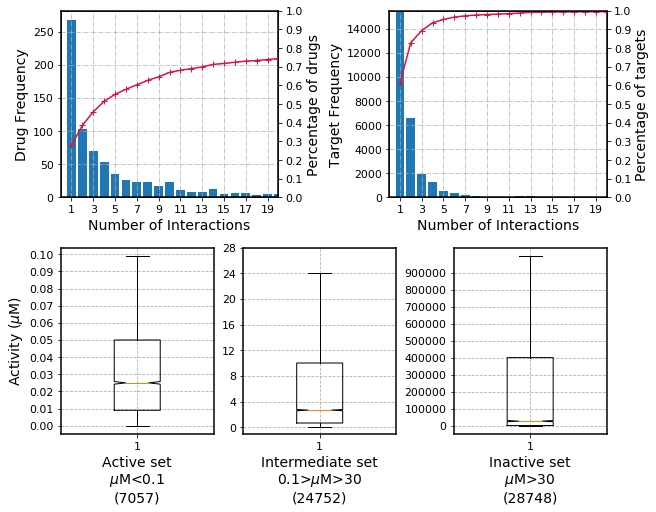

In [75]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(9,7))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax5 = fig.add_subplot(gs[0, 3:])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1, 2:4])
ax4 = fig.add_subplot(gs[1, 4:])

for axis in [ax1, ax2, ax3, ax4, ax5]:
    for dir in ['top','bottom','left','right']:
        axis.spines[dir].set_linewidth(1.5)

# Subplot 1
ax1.bar(x,y)
ax1.tick_params(axis="x", labelsize=11)
ax1.tick_params(axis="y", labelsize=11)
ax1.set_ylabel('Drug Frequency', fontsize = 14)
ax1.set_xlabel('Number of Interactions', fontsize = 14)
ax1.grid(linestyle='-.', linewidth=0.7)
ax1.set_xlim([0,20])
ax1.set_xticks(np.arange(1, 21, 2))
# Twin axis
axs0 = ax1.twinx()
axs0.plot(x[0:20], percent ,marker='+', color='crimson')
axs0.set_ylim([0,1])
axs0.set_yticks(np.arange(0, 1.1, 0.1))
axs0.tick_params(axis='y', labelsize=11)
axs0.set_ylabel('Percentage of drugs', fontsize = 14)

# Subplot 2
ax5.bar(x_t,y_t)
ax5.tick_params(axis="x", labelsize=11)
ax5.tick_params(axis="y", labelsize=11)
ax5.set_ylabel('Target Frequency', fontsize = 14)
ax5.set_xlabel('Number of Interactions', fontsize = 14)
ax5.grid(linestyle='-.', linewidth=0.7)
ax5.set_ylim([0,15500])
ax5.set_xlim([0,20])
ax5.set_xticks(np.arange(1, 21, 2))
# Twin axis
axs1 = ax5.twinx()
axs1.plot(x_t[0:20], percent_t ,marker='+', color='crimson')
axs1.set_ylim([0,1])
axs1.set_yticks(np.arange(0, 1.1, 0.1))
axs1.tick_params(axis='y', labelsize=11)
axs1.set_ylabel('Percentage of targets', fontsize = 14)
plt.tight_layout()


#ax2.set_title('Datapoints:%s'%(collections.Counter(DTI_final['IC50']<0.1)[1]))
ax2.boxplot(DTI_final['IC50'][DTI_final['IC50']<0.1], notch=True, widths=0.3)
ax2.set_yticks(np.arange(0, 0.11, 0.01))
ax2.set_ylabel('Activity ('+ r'$\mu$'+'M)', fontsize = 14)

#ax3.set_title('Datapoints:%s'%(collections.Counter((DTI_final['IC50']>0.1)&(DTI_final['IC50']<30))[1]))
ax3.boxplot(DTI_final['IC50'][(DTI_final['IC50']>0.1)&(DTI_final['IC50']<30)], notch=True, showfliers=False, widths=0.3)
ax3.set_yticks(np.arange(0, 30, 4))

#ax4.set_title('Datapoints:%s'%(collections.Counter(DTI_final['IC50']>30)[1]))
ax4.boxplot(DTI_final['IC50'][DTI_final['IC50']>30], notch=True, showfliers=False, widths=0.3)
ax4.set_yticks(np.arange(0, 1000000, 100000))
#ax4.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

intermediate = str(collections.Counter((DTI_final['IC50']>0.1)&(DTI_final['IC50']<30))[1])
active = str(collections.Counter(DTI_final['IC50']<0.1)[1])
inactive = str(collections.Counter(DTI_final['IC50']>30)[1])

for axis,name in zip([ax2,ax3,ax4],[r'Active set%s$\mu$M<0.1'%'\n'+'\n('+active+')', r'Intermediate set%s0.1>$\mu$M>30'%'\n'+'\n('+intermediate+')', r'Inactive set%s$\mu$M>30'%'\n'+'\n('+inactive+')']):
    axis.set_xlabel(name, fontsize=14)
    axis.grid(linestyle='--')
    axis.tick_params(axis="x", labelsize=11)
    axis.tick_params(axis="y", labelsize=11) 

#format_axes(fig)
fig.tight_layout()
#plt.savefig('plots/data_statistic.png', dpi=500, format = 'png', bbox_inches='tight')

plt.show()